In [1]:
library(knitr)
library(dplyr)
library(survival)
library(ggplot2)
library(tibble)
library(lubridate)
library("gtsummary")
library(ggsurvfit)
library(tidycmprsk)
#library('ggforest')
library("svglite")
library(survminer)
library(tidyverse)
library(broom)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



Attaching package: ‘lubridate’


The following objects are masked from ‘package:base’:

    date, intersect, setdiff, union



Attaching package: ‘tidycmprsk’


The following object is masked from ‘package:gtsummary’:

    trial


Loading required package: ggpubr


Attaching package: ‘survminer’


The following object is masked from ‘package:survival’:

    myeloma


── Attaching core tidyverse packages ─────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ stringr 1.5.1
✔ purrr   1.0.2     ✔ tidyr   1.3.1
✔ readr   2.1.4     
── Conflicts ───────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r

In [2]:
live = read.csv("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/CoralPersistence/metadata/FragSurvivalData_site..csv", 
                header = T)
head(live)

,Reef.Site,Reef,Tag.,Fragnum,Genotype,GenCode,MaxOfSurveynum,MaxOfMedDate,MaxOfDay.,ColType,censor
,<chr>,<chr>,<int>,<chr>,<chr>,<int>,<int>,<chr>,<int>,<chr>,<int>
1,Carysfort Reef,CF,3,1A,CN2,3,2,7/19/18,28,L,1
2,Carysfort Reef,CF,3,2B,CN2,3,10,12/5/19,532,L,0
3,Carysfort Reef,CF,3,3,CN2,3,10,12/5/19,532,L,0
4,Carysfort Reef,CF,3,4,CN2,3,10,12/5/19,532,L,0
5,Carysfort Reef,CF,3,5,CN2,3,10,12/5/19,532,L,0
6,Carysfort Reef,CF,3,6,CN2,3,3,9/19/18,90,L,1


In [5]:
res.cox <- coxph(Surv(MaxOfDay.,censor) ~ Genotype + Reef, data =  live)
res.cox 

Call:
coxph(formula = Surv(MaxOfDay., censor) ~ Genotype + Reef, data = live)

               coef exp(coef) se(coef)      z        p
GenotypeCN4  1.7115    5.5373   0.2703  6.331 2.43e-10
GenotypeHS1  0.1276    1.1361   0.3097  0.412     0.68
GenotypeML2  1.3234    3.7563   0.3094  4.277 1.89e-05
ReefND      -2.1169    0.1204   0.2359 -8.973  < 2e-16
ReefPI      -2.5523    0.0779   0.2706 -9.431  < 2e-16

Likelihood ratio test=175.4  on 5 df, p=< 2.2e-16
n= 440, number of events= 117 

In [6]:
out = tidy(res.cox)
head(out)

term,estimate,std.error,statistic,p.value
<chr>,<dbl>,<dbl>,<dbl>,<dbl>
GenotypeCN4,1.7115159,0.2703325,6.3311504,2.433400e-10
GenotypeHS1,0.1275629,0.3096857,0.4119109,6.804048e-01
GenotypeML2,1.3234314,0.3094095,4.2772809,1.891900e-05
ReefND,-2.1169315,0.2359104,-8.9734550,2.873563e-19
ReefPI,-2.5523238,0.2706244,-9.4312393,4.052717e-21


In [70]:
#write.csv(out,"/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/table_cox.csv")

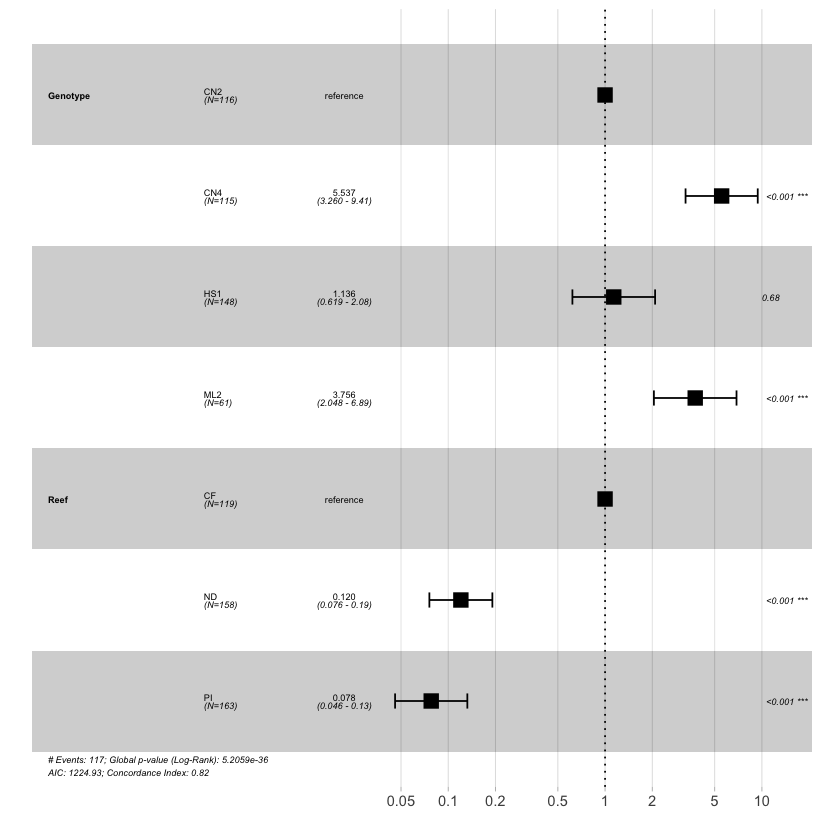

In [7]:
ggforest(res.cox, data = live,
        fontsize=0.5, main=NULL)
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig2.svg", width=4, height=4,dpi = 300)


Warning message:
“Using `size` aesthetic for lines was deprecated in ggplot2 3.4.0.
ℹ Please use `linewidth` instead.”


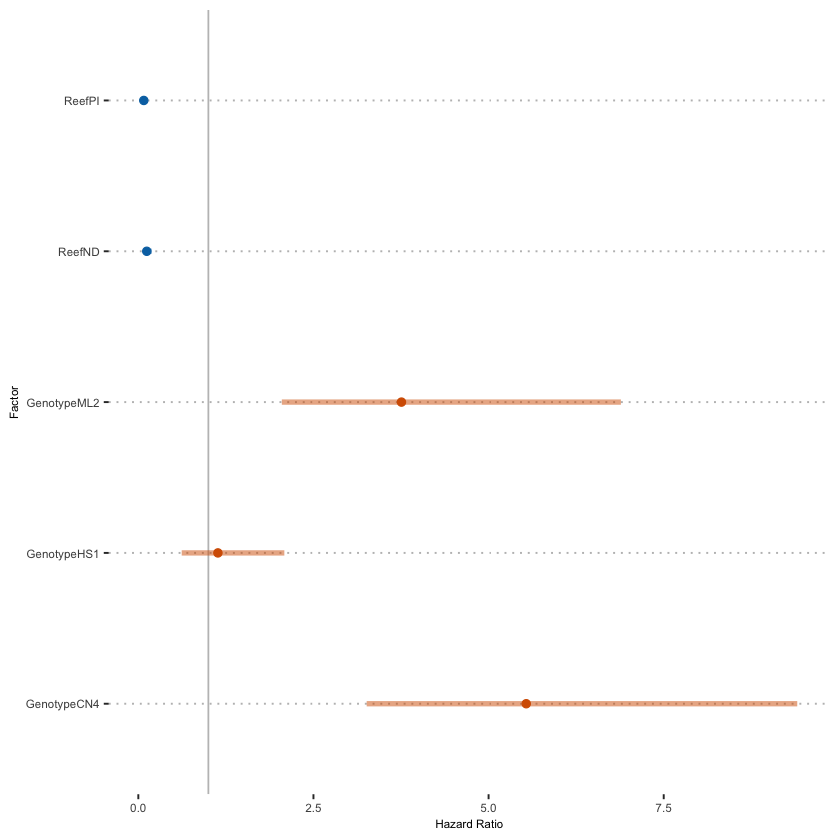

In [8]:

coxph(Surv(MaxOfDay.,censor) ~ Genotype + Reef, data =  live)  %>%
  tidy() %>%
  mutate(upper = estimate + 1.96 * std.error,
         lower = estimate - 1.96 * std.error) %>%
  mutate(across(all_of(c("estimate", "lower", "upper")), exp)) %>%
  ggplot(aes(estimate, term, color = estimate > 1)) +
  geom_vline(xintercept = 1, color = "gray75") +
  geom_linerange(aes(xmin = lower, xmax = upper), size = 1.5, alpha = 0.5) +
  geom_point(size = 2) +
  theme_pubclean() +
  scale_color_manual(values = c("#0072b2", "#d55e00"), guide = "none") +
 xlab("Hazard Ratio") +
 ylab("Factor") +
  theme(legend.text = element_text(size = 7), legend.position = "top") +
  theme(axis.title.x = element_text(size = 7)) +
  theme(axis.title.y = element_text(size = 7)) +
  theme(axis.text.x = element_text(size = 7)) +
  theme(axis.text.y = element_text(size = 7)) 
 # xlim(c(0, 5))
#ggsave("/Users/stephanie.rosales/Documents/omics_projects/POR_16S/figures/Fig2.png", width=4, height=4,dpi = 300)
